In [16]:
import io
import json
import PyPDF2
import re
import requests
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
url = "https://www.cmnovalima.mg.gov.br/wp-content/uploads/2020/09/12ata-r.e.-virtual-setembro-10-09-2020.pdf"

In [44]:
resposta =  requests.get(url)


In [46]:
with io.BytesIO(resposta.content) as abrir_pdf:
    ler_pdf = PyPDF2.PdfFileReader(abrir_pdf)
    number = ler_pdf.numPages
    text= ""
    for i in range(number):
        pagina= ler_pdf.getPage(i)
        text += pagina.extractText()

In [60]:
text.encode('UTF-8')

b' \n \n \n1\n \n \nAta dos trabalhos da Reuni\xc3\xa3o \nExtrao\nrdin\xc3\xa1ria \nRemota (\nVirtual\n)\n \nda C\xc3\xa2mara Municipal de \nNova Lima. No dia \ndez\n \nde \ns\ne\nt\nembr\no\n \nde dois mil e vinte, \xc3\xa0s dezesse\nis\n \nhoras e quinze \nminutos, reuniu\n-\nse a C\xc3\xa2mara, virtualmente, conforme Portaria n\xc2\xba 50, de 17 de abril de \n202\n\n\npresentes; constatando\n-\nse a exist\xc3\xaancia de n\xc3\xbamero legal, verificando\n-\nse a\n \npresen\xc3\xa7a virtual \nde todos \no\ns\n \nvereadore\ns\n. O Senhor Presidente, sob a prote\xc3\xa7\xc3\xa3o de Deus e em nome do \npovo nova\n-\nlimense, declarou aberta a reuni\xc3\xa3o. \nLogo ap\xc3\xb3s, comunicou que a\ns\n \nAta\ns\n \nda\ns\n \nReuni\xc3\xb5es \nExtraordin\xc3\xa1ria\ns\n \nVirtua\nis\n \ndo\n \ndia\n \nvinte\n \ne sete\n \nd\ne a\ng\no\nsto\n \ne do dia tr\xc3\xaas de setembro \nde\n \ndois mil e vinte fo\nram\n \nencaminhada\ns\n \naos gabinetes para os vereadores conferirem\n-\nna\ns\n. Colo

In [30]:
tokens = word_tokenize(text)

pontuacao = ['(',')',';',':','[',']',',']

stop_words = stopwords.words('portuguese')

In [33]:
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [36]:
palavra = [palavra for palavra in tokens if palavra not in stop_words]

In [37]:
print(palavra)

['1', 'Ata', 'trabalhos', 'Reunião', 'Extrao', 'rdinária', 'Remota', '(', 'Virtual', ')', 'Câmara', 'Municipal', 'Nova', 'Lima', '.', 'No', 'dia', 'dez', 's', 't', 'embr', 'dois', 'mil', 'vinte', ',', 'dezesse', 'is', 'horas', 'quinze', 'minutos', ',', 'reuniu', '-', 'Câmara', ',', 'virtualmente', ',', 'conforme', 'Portaria', 'nº', '50', ',', '17', 'abril', '202', 'presentes', ';', 'constatando', '-', 'existência', 'número', 'legal', ',', 'verificando', '-', 'presença', 'virtual', 'todos', 's', 'vereadore', 's', '.', 'O', 'Senhor', 'Presidente', ',', 'sob', 'proteção', 'Deus', 'nome', 'povo', 'nova', '-', 'limense', ',', 'declarou', 'aberta', 'reunião', '.', 'Logo', 'após', ',', 'comunicou', 's', 'Ata', 's', 's', 'Reuniões', 'Extraordinária', 's', 'Virtua', 'is', 'dia', 'vinte', 'sete', 'd', 'g', 'sto', 'dia', 'três', 'setembro', 'dois', 'mil', 'vinte', 'fo', 'ram', 'encaminhada', 's', 'gabinetes', 'vereadores', 'conferirem', '-', 's', '.', 'Colocou', '-', 's', 'discussão', ',', 'nenhu

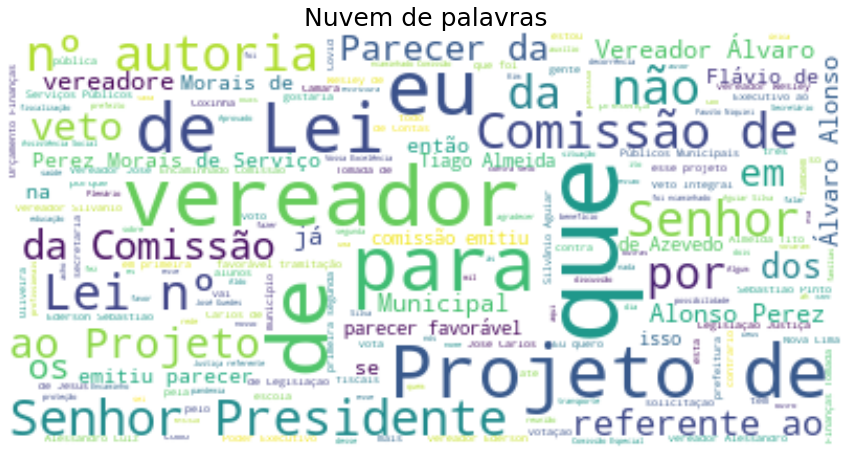

In [38]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 500, max_font_size=50).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(text,  'Nuvem de palavras')